## Intro to Dataframes

In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], columns=["A", "B", "C"], index=["x","y","z",'zz'])

In [15]:
df.describe()

A          B          C
count   4.000000   4.000000   4.000000
mean    5.500000   6.500000   7.500000
std     3.872983   3.872983   3.872983
min     1.000000   2.000000   3.000000
25%     3.250000   4.250000   5.250000
50%     5.500000   6.500000   7.500000
75%     7.750000   8.750000   9.750000
max    10.000000  11.000000  12.000000

In [21]:
df

A  B  C
x  1  2  3
y  4  5  6
z  7  8  9

## Loading in Dataframes from Files

In [3]:
coffee = pd.read_csv('./warmup-data/coffee.csv')

In [17]:
results = pd.read_parquet('./data/results.parquet')
bios = pd.read_csv('./data/bios.csv')

## Accessing Data with Pandas

In [6]:
print(coffee)

          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35


In [7]:
display(coffee)

Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35

In [8]:
coffee.head()

Day Coffee Type  Units Sold
0     Monday    Espresso          25
1     Monday       Latte          15
2    Tuesday    Espresso          30
3    Tuesday       Latte          20
4  Wednesday    Espresso          35

In [9]:
coffee.tail(10)

Day Coffee Type  Units Sold
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35

In [10]:
coffee.sample(5) # Pass in random_state to make deterministic

Day Coffee Type  Units Sold
11  Saturday       Latte          35
0     Monday    Espresso          25
6   Thursday    Espresso          40
7   Thursday       Latte          30
13    Sunday       Latte          35

In [11]:
# loc
# coffee.loc[Rows, Columns]

coffee.loc[0]

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

In [14]:
coffee.loc[[0,1,5]]

Day Coffee Type  Units Sold
0     Monday    Espresso          25
1     Monday       Latte          15
5  Wednesday       Latte          25

In [15]:
coffee.loc[5:9, ["Day", "Units Sold"]]

Day  Units Sold
5  Wednesday          25
6   Thursday          40
7   Thursday          30
8     Friday          45
9     Friday          35

#### iloc

In [16]:
coffee.iloc[:, [0,2]]

Day  Units Sold
0      Monday          25
1      Monday          15
2     Tuesday          30
3     Tuesday          20
4   Wednesday          35
5   Wednesday          25
6    Thursday          40
7    Thursday          30
8      Friday          45
9      Friday          35
10   Saturday          45
11   Saturday          35
12     Sunday          45
13     Sunday          35

#### Other Stuff

In [17]:
coffee.index = coffee["Day"]

In [18]:
coffee.loc["Monday":"Wednesday"]

Day Coffee Type  Units Sold
Day                                         
Monday        Monday    Espresso          25
Monday        Monday       Latte          15
Tuesday      Tuesday    Espresso          30
Tuesday      Tuesday       Latte          20
Wednesday  Wednesday    Espresso          35
Wednesday  Wednesday       Latte          25

In [19]:
coffee = pd.read_csv('./warmup-data/coffee.csv')

#### Setting Values

In [21]:
coffee.loc[1:3, "Units Sold"] = 10

#### Optimized way to get single values (.at & .iat)

In [22]:
coffee.at[0,"Units Sold"]

25

In [24]:
coffee.iat[3,1]

'Latte'

#### Getting Columns

In [25]:
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

In [26]:
coffee["Day"]

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

#### Sort Values

In [27]:
coffee.sort_values(["Units Sold"], ascending=False)

Day Coffee Type  Units Sold
8      Friday    Espresso          45
10   Saturday    Espresso          45
12     Sunday    Espresso          45
6    Thursday    Espresso          40
4   Wednesday    Espresso          35
9      Friday       Latte          35
11   Saturday       Latte          35
13     Sunday       Latte          35
7    Thursday       Latte          30
0      Monday    Espresso          25
5   Wednesday       Latte          25
1      Monday       Latte          10
2     Tuesday    Espresso          10
3     Tuesday       Latte          10

In [28]:
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=[0,1])

Day Coffee Type  Units Sold
8      Friday    Espresso          45
10   Saturday    Espresso          45
12     Sunday    Espresso          45
6    Thursday    Espresso          40
4   Wednesday    Espresso          35
9      Friday       Latte          35
11   Saturday       Latte          35
13     Sunday       Latte          35
7    Thursday       Latte          30
0      Monday    Espresso          25
5   Wednesday       Latte          25
2     Tuesday    Espresso          10
1      Monday       Latte          10
3     Tuesday       Latte          10

#### Iterate over dataframe with for loop

In [31]:
for index, row in coffee.iterrows():
    print(index)
    print(row)
    print("Coffee Type of Row:", row["Coffee Type"])

0
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object
Coffee Type of Row: Espresso
1
Day            Monday
Coffee Type     Latte
Units Sold         10
Name: 1, dtype: object
Coffee Type of Row: Latte
2
Day             Tuesday
Coffee Type    Espresso
Units Sold           10
Name: 2, dtype: object
Coffee Type of Row: Espresso
3
Day            Tuesday
Coffee Type      Latte
Units Sold          10
Name: 3, dtype: object
Coffee Type of Row: Latte
4
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: 4, dtype: object
Coffee Type of Row: Espresso
5
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: 5, dtype: object
Coffee Type of Row: Latte
6
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: 6, dtype: object
Coffee Type of Row: Espresso
7
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: 7, dtype: object
Coffee Type of Row: Latte
8
Day  

## Filtering Data

In [12]:
bios[bios['name'].str.contains('keith|patrick', case=False, regex=False)]

Empty DataFrame
Columns: [athlete_id, name, born_date, born_city, born_region, born_country, NOC, height_cm, weight_kg, died_date]
Index: []

## Adding / Removing Columns

In [18]:
coffee['price'] = 4.99

In [19]:
coffee['new_price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99) 

In [20]:
coffee

Day Coffee Type  Units Sold  price  new_price
0      Monday    Espresso          25   4.99       3.99
1      Monday       Latte          15   4.99       5.99
2     Tuesday    Espresso          30   4.99       3.99
3     Tuesday       Latte          20   4.99       5.99
4   Wednesday    Espresso          35   4.99       3.99
5   Wednesday       Latte          25   4.99       5.99
6    Thursday    Espresso          40   4.99       3.99
7    Thursday       Latte          30   4.99       5.99
8      Friday    Espresso          45   4.99       3.99
9      Friday       Latte          35   4.99       5.99
10   Saturday    Espresso          45   4.99       3.99
11   Saturday       Latte          35   4.99       5.99
12     Sunday    Espresso          45   4.99       3.99
13     Sunday       Latte          35   4.99       5.99

In [21]:
coffee.drop(columns=['price'], inplace=True)

# the below would also have worked
# coffee = coffee.drop(columns=['price'])

In [ ]:
coffee = coffee[['Day', 'Coffee Type', 'Units Sold', 'new_price']]

Day Coffee Type  Units Sold  new_price
0      Monday    Espresso          25       3.99
1      Monday       Latte          15       5.99
2     Tuesday    Espresso          30       3.99
3     Tuesday       Latte          20       5.99
4   Wednesday    Espresso          35       3.99
5   Wednesday       Latte          25       5.99
6    Thursday    Espresso          40       3.99
7    Thursday       Latte          30       5.99
8      Friday    Espresso          45       3.99
9      Friday       Latte          35       5.99
10   Saturday    Espresso          45       3.99
11   Saturday       Latte          35       5.99
12     Sunday    Espresso          45       3.99
13     Sunday       Latte          35       5.99

In [23]:
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']

In [24]:
coffee

Day Coffee Type  Units Sold  new_price  revenue
0      Monday    Espresso          25       3.99    99.75
1      Monday       Latte          15       5.99    89.85
2     Tuesday    Espresso          30       3.99   119.70
3     Tuesday       Latte          20       5.99   119.80
4   Wednesday    Espresso          35       3.99   139.65
5   Wednesday       Latte          25       5.99   149.75
6    Thursday    Espresso          40       3.99   159.60
7    Thursday       Latte          30       5.99   179.70
8      Friday    Espresso          45       3.99   179.55
9      Friday       Latte          35       5.99   209.65
10   Saturday    Espresso          45       3.99   179.55
11   Saturday       Latte          35       5.99   209.65
12     Sunday    Espresso          45       3.99   179.55
13     Sunday       Latte          35       5.99   209.65

In [25]:
coffee.rename(columns={'new_price': 'price'}, inplace=True)

In [27]:
bios_new = bios.copy()

In [28]:
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]

In [30]:
bios_new.query('first_name == "Keith"')

athlete_id               name   born_date     born_city  \
1897          1907       Keith Hanlon  1966-09-01           NaN   
3505          3517      Keith Wallace  1961-03-29       Preston   
6228          6255      Keith Hartley  1940-10-15     Vancouver   
8898          8946        Keith Mwila  1966-01-01           NaN   
12053        12118       Keith Hervey  1898-11-03        Fulham   
...            ...                ...         ...           ...   
99921       100722       Keith Carney  1970-02-03    Providence   
102227      103168      Keith Beavers  1983-02-09        London   
109900      111105  Keith Cumberpatch  1927-08-25  Christchurch   
115973      117348    Keith Sanderson  1975-02-02      Plymouth   
122121      124176     Keith Ferguson  1979-09-07          Sale   

             born_region born_country            NOC  height_cm  weight_kg  \
1897                 NaN          NaN        Ireland        NaN        NaN   
3505             England          GBR  Great Britain      165.0       51.0   
6228    British Columbia          CAN         Canada      200.0       85.0   
8898                 NaN          NaN         Zambia        NaN        NaN   
12053            England          GBR  Great Britain        NaN        NaN   
...                  ...          ...            ...        ...        ...   
99921       Rhode Island          USA  United States      188.0       93.0   
102227           Ontario          CAN         Canada      185.0       75.0   
109900        Canterbury          NZL    New Zealand        NaN        NaN   
115973     Massachusetts          USA  United States      183.0       95.0   
122121          Victoria          AUS      Australia      176.0       78.0   

         died_date first_name  
1897           NaN      Keith  
3505    1999-12-31      Keith  
6228           NaN      Keith  
8898    1993-01-09      Keith  
12053   1973-02-22      Keith  
...            ...        ...  
99921          NaN      Keith  
102227         NaN      Keith  
109900  2013-11-15      Keith  
115973         NaN      Keith  
122121         NaN      Keith  

[64 rows x 11 columns]

In [31]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'])

In [32]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year

In [33]:
bios_new[['name','born_year']]

name  born_year
0       Jean-François Blanchy     1886.0
1              Arnaud Boetsch     1969.0
2                Jean Borotra     1898.0
3             Jacques Brugnon     1895.0
4                Albert Canet     1878.0
...                       ...        ...
145495      Polina Luchnikova     2002.0
145496    Valeriya Merkusheva     1999.0
145497        Yuliya Smirnova     1998.0
145498         André Foussard     1899.0
145499          Bill Phillips     1913.0

[145500 rows x 2 columns]

In [34]:
bios_new.to_csv('./data/bios_new.csv', index=False)

In [5]:
bios['height_category'] = bios['height_cm'].apply(lambda x: 'Short' if x < 165 else ('Average' if x < 185 else 'Tall'))

In [7]:
def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
    
bios['Category'] = bios.apply(categorize_athlete, axis=1)

In [8]:
bios.head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg  \
0               Gironde          FRA  France        NaN        NaN   
1              Yvelines          FRA  France      183.0       76.0   
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0   
3                 Paris          FRA  France      168.0       64.0   
4               England          GBR  France        NaN        NaN   

    died_date height_category      Category  
0  1960-10-02            Tall   Heavyweight  
1         NaN         Average  Middleweight  
2  1994-07-17         Average  Middleweight  
3  1978-03-20         Average   Lightweight  
4  1930-07-25            Tall   Heavyweight

## Adding / Removing Columns

In [183]:
bios_new = bios.copy()

In [184]:
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]

In [187]:
bios_new.query('first_name == "Keith"')

athlete_id               name   born_date     born_city  \
1897          1907       Keith Hanlon  1966-09-01           NaN   
3505          3517      Keith Wallace  1961-03-29       Preston   
6228          6255      Keith Hartley  1940-10-15     Vancouver   
8898          8946        Keith Mwila  1966-01-01           NaN   
12053        12118       Keith Hervey  1898-11-03        Fulham   
...            ...                ...         ...           ...   
99921       100722       Keith Carney  1970-02-03    Providence   
102227      103168      Keith Beavers  1983-02-09        London   
109900      111105  Keith Cumberpatch  1927-08-25  Christchurch   
115973      117348    Keith Sanderson  1975-02-02      Plymouth   
122121      124176     Keith Ferguson  1979-09-07          Sale   

             born_region born_country            NOC  height_cm  weight_kg  \
1897                 NaN          NaN        Ireland        NaN        NaN   
3505             England          GBR  Great Britain      165.0       51.0   
6228    British Columbia          CAN         Canada      200.0       85.0   
8898                 NaN          NaN         Zambia        NaN        NaN   
12053            England          GBR  Great Britain        NaN        NaN   
...                  ...          ...            ...        ...        ...   
99921       Rhode Island          USA  United States      188.0       93.0   
102227           Ontario          CAN         Canada      185.0       75.0   
109900        Canterbury          NZL    New Zealand        NaN        NaN   
115973     Massachusetts          USA  United States      183.0       95.0   
122121          Victoria          AUS      Australia      176.0       78.0   

         died_date first_name  
1897           NaN      Keith  
3505    1999-12-31      Keith  
6228           NaN      Keith  
8898    1993-01-09      Keith  
12053   1973-02-22      Keith  
...            ...        ...  
99921          NaN      Keith  
102227         NaN      Keith  
109900  2013-11-15      Keith  
115973         NaN      Keith  
122121         NaN      Keith  

[64 rows x 11 columns]

In [189]:
bios_new.head()

athlete_id                   name   born_date    born_city  \
0           1  Jean-François Blanchy  1886-12-12     Bordeaux   
1           2         Arnaud Boetsch  1969-04-01       Meulan   
2           3           Jean Borotra  1898-08-13     Biarritz   
3           4        Jacques Brugnon  1895-05-11  Paris VIIIe   
4           5           Albert Canet  1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg  \
0               Gironde          FRA  France        NaN        NaN   
1              Yvelines          FRA  France      183.0       76.0   
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0   
3                 Paris          FRA  France      168.0       64.0   
4               England          GBR  France        NaN        NaN   

    died_date     first_name  
0  1960-10-02  Jean-François  
1         NaN         Arnaud  
2  1994-07-17           Jean  
3  1978-03-20        Jacques  
4  1930-07-25         Albert

In [191]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'])

In [195]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year

bios_new[['name','born_year']]

name  born_year
0       Jean-François Blanchy     1886.0
1              Arnaud Boetsch     1969.0
2                Jean Borotra     1898.0
3             Jacques Brugnon     1895.0
4                Albert Canet     1878.0
...                       ...        ...
145495      Polina Luchnikova     2002.0
145496    Valeriya Merkusheva     1999.0
145497        Yuliya Smirnova     1998.0
145498         André Foussard     1899.0
145499          Bill Phillips     1913.0

[145500 rows x 2 columns]

In [196]:
bios_new.to_csv('./data/bios_new.csv', index=False)

## Merging & Concatenating Data

In [210]:
nocs = pd.read_csv('./data/noc_regions.csv')

In [211]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')

In [212]:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

In [218]:
usa = bios[bios['born_country']=='USA'].copy()
gbr = bios[bios['born_country']=='GBR'].copy()

In [224]:
new_df = pd.concat([usa,gbr])

In [226]:
new_df.tail()

athlete_id                name   born_date     born_city born_region  \
144811      148512  Benjamin Alexander  1983-05-08        London     England   
144815      148517       Ashley Watson  1993-10-28  Peterborough     England   
145005      148716     Peder Kongshaug  2001-08-13     Wimbledon     England   
145319      149041          Axel Brown  1992-04-02     Harrogate     England   
145388      149111      Jean-Luc Baker  1993-10-07       Burnley     England   

       born_country                  NOC  height_cm  weight_kg died_date  
144811          GBR              Jamaica        NaN        NaN       NaN  
144815          GBR              Jamaica        NaN        NaN       NaN  
145005          GBR               Norway      184.0       86.0       NaN  
145319          GBR  Trinidad and Tobago        NaN        NaN       NaN  
145388          GBR        United States        NaN        NaN       NaN

In [228]:
combined_df = pd.merge(results, bios, on='athlete_id', how='left')

In [229]:
combined_df.head()

year    type discipline                     event                     as  \
0  1912.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
1  1912.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
2  1920.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
3  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)  Jean-François Blanchy   
4  1920.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   

   athlete_id  noc             team  place   tied medal  \
0           1  FRA             None   17.0   True  None   
1           1  FRA   Jean Montariol    NaN  False  None   
2           1  FRA             None   32.0   True  None   
3           1  FRA  Jeanne Vaussard    8.0   True  None   
4           1  FRA  Jacques Brugnon    4.0  False  None   

                    name   born_date born_city born_region born_country  \
0  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
1  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
2  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
3  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
4  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   

      NOC  height_cm  weight_kg   died_date  
0  France        NaN        NaN  1960-10-02  
1  France        NaN        NaN  1960-10-02  
2  France        NaN        NaN  1960-10-02  
3  France        NaN        NaN  1960-10-02  
4  France        NaN        NaN  1960-10-02

## Handling Null Values

In [249]:
coffee.loc[[2,3], 'Units Sold'] = np.nan

In [253]:
coffee[coffee['Units Sold'].notna()]

Day Coffee Type  Units Sold  price  revenue
0      Monday    Espresso        15.0   3.99    99.75
1      Monday       Latte        15.0   5.99    89.85
4   Wednesday    Espresso        35.0   3.99   139.65
5   Wednesday       Latte        25.0   5.99   149.75
6    Thursday    Espresso        40.0   3.99   159.60
7    Thursday       Latte        30.0   5.99   179.70
8      Friday    Espresso        45.0   3.99   179.55
9      Friday       Latte        35.0   5.99   209.65
10   Saturday    Espresso        45.0   3.99   179.55
11   Saturday       Latte        35.0   5.99   209.65
12     Sunday    Espresso        45.0   3.99   179.55
13     Sunday       Latte        35.0   5.99   209.65

In [245]:
coffee

Day Coffee Type  Units Sold  price  revenue
0      Monday    Espresso   15.000000   3.99    99.75
1      Monday       Latte   15.000000   5.99    89.85
2     Tuesday    Espresso   21.666667   3.99   119.70
3     Tuesday       Latte   28.333333   5.99   119.80
4   Wednesday    Espresso   35.000000   3.99   139.65
5   Wednesday       Latte   25.000000   5.99   149.75
6    Thursday    Espresso   40.000000   3.99   159.60
7    Thursday       Latte   30.000000   5.99   179.70
8      Friday    Espresso   45.000000   3.99   179.55
9      Friday       Latte   35.000000   5.99   209.65
10   Saturday    Espresso   45.000000   3.99   179.55
11   Saturday       Latte   35.000000   5.99   209.65
12     Sunday    Espresso   45.000000   3.99   179.55
13     Sunday       Latte   35.000000   5.99   209.65

## Aggregating Data

In [293]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['month_born'] = bios['born_date'].dt.month
bios['year_born'] = bios['born_date'].dt.year
bios.groupby([bios['year_born'],bios['month_born']])['name'].count().reset_index().sort_values('name', ascending=False)

year_born  month_born  name
1437     1970.0         1.0   239
1461     1972.0         1.0   229
1629     1986.0         1.0   227
1497     1975.0         1.0   227
1617     1985.0         1.0   225
...         ...         ...   ...
95       1857.0         5.0     1
96       1857.0         7.0     1
97       1857.0         8.0     1
98       1857.0         9.0     1
1884     2009.0         1.0     1

[1885 rows x 3 columns]

## Advanced Functionality



In [15]:
import janitor

coffee.clean_names()

day coffee_type  units_sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35

In [19]:
from skimpy import skim

skim(results)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 308408 │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA      ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ year           │    2601 │  0.84 │   2000 │     31 │  1900 │   2000 │   2000 │    2000 │    2000 │ ▁▂▂▅▇▇  │  │
│ │ athlete_id     │       0 │     0 │  73000 │  41000 │     1 │  34000 │  74000 │  110000 │  150000 │ ▆▇▆▇▇▅  │  │
│ │ place          │   25215 │  8.18 │     16 │     19 │     1 │      5 │      9 │      20 │     180 │   ▇▁    │  │
│ └────────────────┴─────────┴───────┴────────┴────────┴───────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ true              ┃ true rate                    ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tied                              │             45940 │                         0.15 │       ▇    ▁        │  │
│ └───────────────────────────────────┴───────────────────┴──────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA            ┃ NA %        ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ type                    │          2601 │        0.84 │                       0.99 │                305807 │  │
│ │ discipline              │             1 │           0 │                          2 │                610211 │  │
│ │ event                   │             0 │           0 │                        4.2 │               1303323 │  │
│ │ as                      │             0 │           0 │                        2.1 │                634574 │  │
│ │ noc                     │             1 │           0 │                          1 │                308407 │  │
│ │ team                    │        186694 │       60.53 │                       0.62 │                190405 │  │
│ │ medal                   │        264269 │       85.6

In [319]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                14 non-null     object 
 1   Coffee Type        14 non-null     object 
 2   Units Sold         14 non-null     float64
 3   price              14 non-null     float64
 4   revenue            14 non-null     float64
 5   yesterday_revenue  12 non-null     float64
 6   pct_change         12 non-null     float64
dtypes: float64(5), object(2)
memory usage: 916.0+ bytes


In [331]:
latte = coffee[coffee['Coffee Type']=="Latte"].copy()
latte['3day'] = latte['Units Sold'].rolling(3).sum()

In [332]:
latte

Day Coffee Type  Units Sold  price  revenue  yesterday_revenue  \
1      Monday       Latte   15.000000   5.99    89.85                NaN   
3     Tuesday       Latte   28.333333   5.99   119.80              89.85   
5   Wednesday       Latte   25.000000   5.99   149.75             119.80   
7    Thursday       Latte   30.000000   5.99   179.70             149.75   
9      Friday       Latte   35.000000   5.99   209.65             179.70   
11   Saturday       Latte   35.000000   5.99   209.65             209.65   
13     Sunday       Latte   35.000000   5.99   209.65             209.65   

    pct_change  cumulative_revenue        3day  
1          NaN               189.6         NaN  
3   133.333333               429.1         NaN  
5   125.000000               718.5   68.333333  
7   120.000000              1057.8   83.333333  
9   116.666667              1447.0   90.000000  
11  100.000000              1836.2  100.000000  
13  100.000000              2225.4  105.000000

## New Functionality

In [335]:
results_numpy = pd.read_csv('./data/results.csv')
results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [337]:
results_numpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [338]:
results_arrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB


In [349]:
filtered_bios = bios[(bios['born_region'] == 'New Hampshire') | (bios['born_city'] == 'San Francisco')]

bios.head()

athlete_id                   name  born_date    born_city  \
0           1  Jean-François Blanchy 1886-12-12     Bordeaux   
1           2         Arnaud Boetsch 1969-04-01       Meulan   
2           3           Jean Borotra 1898-08-13     Biarritz   
3           4        Jacques Brugnon 1895-05-11  Paris VIIIe   
4           5           Albert Canet 1878-04-17   Wandsworth   

            born_region born_country     NOC  height_cm  weight_kg  \
0               Gironde          FRA  France        NaN        NaN   
1              Yvelines          FRA  France      183.0       76.0   
2  Pyrénées-Atlantiques          FRA  France      183.0       76.0   
3                 Paris          FRA  France      168.0       64.0   
4               England          GBR  France        NaN        NaN   

    died_date  month_born  year_born  height_rank  
0  1960-10-02        12.0     1886.0          NaN  
1         NaN         4.0     1969.0      27597.5  
2  1994-07-17         8.0     1898.0      27597.5  
3  1978-03-20         5.0     1895.0      83975.0  
4  1930-07-25         4.0     1878.0          NaN

In [351]:
import pandas as pd

# Creating a DataFrame
data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}

df = pd.DataFrame(data)

# Display the DataFrame
df


Date    Item  Units Sold  Price Per Unit Salesperson
0  2024-05-01   Apple          30            1.00        John
1  2024-05-01  Banana          21            0.50        John
2  2024-05-01  Orange          15            0.75        John
3  2024-05-02   Apple          40            1.00       Alice
4  2024-05-02  Banana          34            0.50       Alice
5  2024-05-03  Orange          20            0.75        John
6  2024-05-03   Apple          45            1.00       Alice
7  2024-05-03  Orange          25            0.75        John

In [353]:
pivot_table = pd.pivot_table(df, values='Units Sold', index='Date', columns='Item', aggfunc='sum')
pivot_table


Salesperson  Alice  John
Date                    
2024-05-01     NaN  66.0
2024-05-02    74.0   NaN
2024-05-03    45.0  45.0

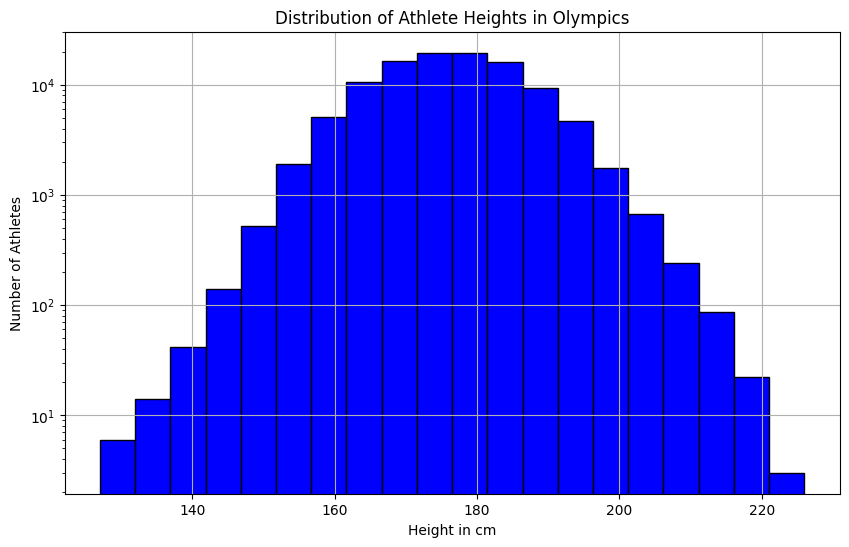

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'bios' and already loaded
# First, filter out rows where the height_cm data is missing
bios_filtered = bios.dropna(subset=['height_cm'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bios_filtered['height_cm'], bins=20, color='blue', edgecolor='black')

plt.title('Distribution of Athlete Heights in Olympics')
plt.xlabel('Height in cm')
plt.ylabel('Number of Athletes')
plt.grid(True)

# Using a logarithmic scale for the y-axis if the data spread is wide
plt.yscale('log')

plt.show()

## What Next???